(-0.5, 799.5, 596.5, -0.5)

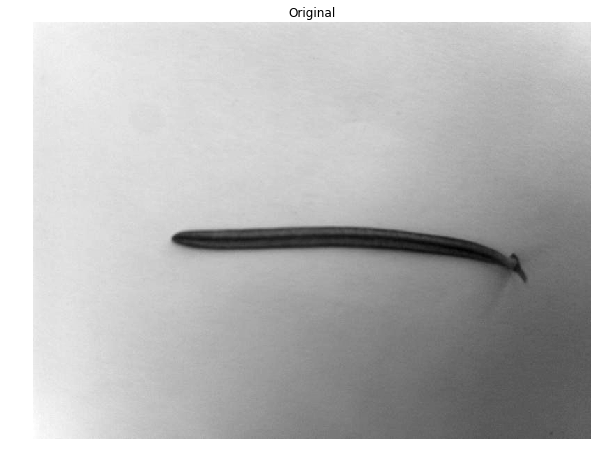

In [33]:
import numpy as np
from scipy import misc
from scipy.ndimage import label
from skimage import data
from skimage.io import imread
from skimage.color import rgb2gray

# Plotting Library
import matplotlib.pyplot as plt

# FUNÇÕES MORFOLOGICAS
from skimage import morphology
from skimage.morphology import square, rectangle, disk

#file_name = 'Folhas2/13291658032668-2.jpg'
file_name = 'Folhas2/12995309741318.jpg'
folha = rgb2gray(imread(file_name))

#folha = morphology.opening(folha, disk(5))
cont_ext = morphology.dilation(folha, disk(3)) - folha


# Exibe imagens
def show_images(image, markers, watershed):
    fig = plt.figure(figsize=(20,20))
    a = fig.add_subplot(1,3,1)
    plt.imshow(image, cmap=plt.cm.gray)
    a.set_title('Original')
    plt.axis('off')

    a = fig.add_subplot(1,3,2)
    plt.imshow(markers, cmap=plt.cm.gray)
    a.set_title('Marcadores')
    plt.axis('off')

    a = fig.add_subplot(1,3,3)
    plt.imshow(watershed,cmap=plt.cm.nipy_spectral, interpolation='nearest')
    a.set_title('Watershed')
    plt.axis('off')
    

fig = plt.figure(figsize=(10,10))
a = fig.add_subplot(1,1,1)
plt.imshow(folha, cmap=plt.cm.gray)
a.set_title('Original')
plt.axis('off')


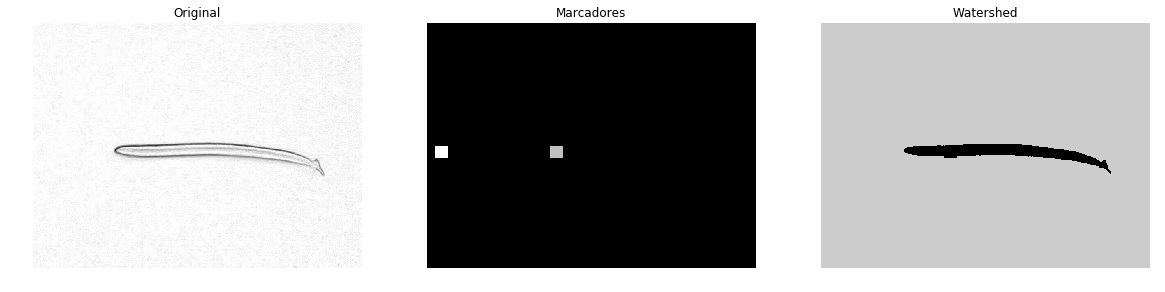

In [34]:
marcador = np.zeros(folha.shape)
marcador[300:330,20:50] = 200
#marcador[100:130,20:50] = 201
marcador[300:330,300:330] = 150
#marcador[300:330,500:530] = 250

ws = morphology.watershed(cont_ext, marcador)
show_images(255-cont_ext, marcador, ws)

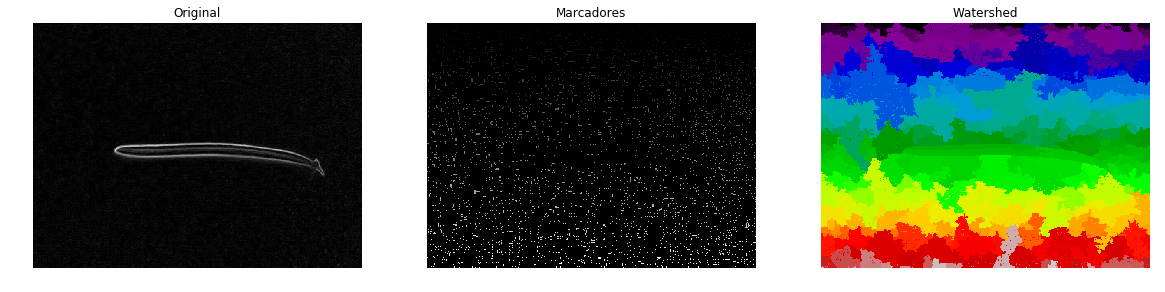

In [35]:
marcador =  label(morphology.extrema.local_minima(folha))[0]
ws = morphology.watershed(cont_ext, marcador)

show_images(cont_ext, marcador, ws)

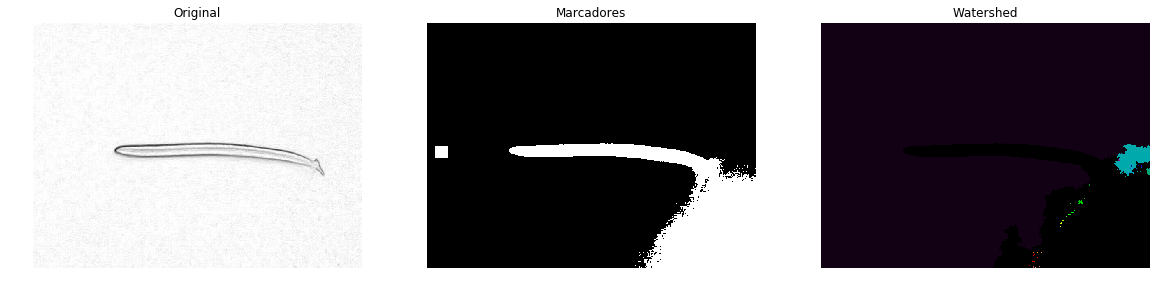

In [42]:
marcador = (folha < 0.45)
marcador[300:330,20:50] = 100


ws = morphology.watershed(cont_ext, label(marcador)[0])
show_images(255-cont_ext, marcador, ws)
